Problem Statement: Prepare a model for the HR department to predict the Attrition and give the insights from the data about the important factors associated with the attrition so that HR can take the corrective or 
previntive measures to stop or control the attrition.

Attrition Def: Attrition is a term used to describe the gradual and natural reduction in the size of a workforce or customer base over time, typically due to voluntary or involuntary departures, such as resignations,  retirements, terminations, or death. It is often used in the context of human resources or customer management, and can have both positive and negative effects on an organization.

In a positive sense, attrition can help an organization to remove low-performing employees, create room for new talent, and save on costs associated with redundant positions. In a negative sense, however, attrition can result in the loss of experienced and valuable employees or customers, and can increase recruitment and training costs.

Attrition is often measured using metrics such as employee turnover rate or customer churn rate, and organizations may develop strategies to minimize attrition and retain their workforce or customer base.

  Attrition Rate = No. of employees left the workforce/Avg.no. of employess



1.Historical Data: (HR_Employee_Attrition_Data.csv) provided by LEARNBAY.

-The dataset contains Employee demographic information(age, gender, occupation, tenure etc).
-Reasons for leaving or discontinuing use (e.g. better job opportunity,  dissatisfaction, retirement, etc)
-Tenure, years at the current role etc.
-Employee saalry and other perks.
-Performance metrics (performance rating/satisfaction, job satisfaction).

2.How to use the information provided in the dataset?

-Identifying the key features to find the reasons and drwaing insights to   undestand the reason for employee turnover by  expolring and analysing the features and patterns.

3.How your analysis and insghts drawn help HR department?
-Targeted interventions to address the specific issues that are driving employees away.
-To improve the onboarding process and ensure that new employees feel supported and engaged from day one.
-Implement interventions to improve employee satisfaction and engagement.
-To provide benifits, oppurtunities for career growth by creating positive  work culture.


Attrition data analysis(EDA) icludes
-Understanding the data.
-Pre-processing the data.
-Exploring the data.
-Transform the data.
-Data Modeling.
-Data Visualization.
-Data Communication.

# Exploratory data analysis(Attrition Dataset)

Import all the modules and the libraries required

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# from sklearn.externals.six import StringIO 
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the dataset
df = pd.read_csv('cleaned_dataset_Attrition_imp_features.csv')

In [3]:
df.head(10)

,Attrition,Age,BusinessTravel,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,Yes,41,Travel_Rarely,2,3,2,Sales Executive,4,Single,5993,Yes,0,8,1,6,4,5
1,No,49,Travel_Frequently,3,2,2,Research Scientist,2,Married,5130,No,1,10,3,10,7,7
2,Yes,37,Travel_Rarely,4,2,1,Laboratory Technician,3,Single,2090,Yes,0,7,3,0,0,0
3,No,33,Travel_Frequently,4,3,1,Research Scientist,3,Married,2909,Yes,0,8,3,8,7,0
4,No,27,Travel_Rarely,1,3,1,Laboratory Technician,2,Married,3468,No,1,6,3,2,2,2
5,No,32,Travel_Frequently,4,3,1,Laboratory Technician,4,Single,3068,No,0,8,2,7,7,6
6,No,59,Travel_Rarely,3,4,1,Laboratory Technician,1,Married,2670,Yes,3,12,2,1,0,0
7,No,30,Travel_Rarely,4,3,1,Laboratory Technician,3,Divorced,2693,No,1,1,3,1,0,0
8,No,38,Travel_Frequently,4,2,3,Manufacturing Director,3,Single,9526,No,0,10,3,9,7,8
9,No,36,Travel_Rarely,3,3,2,Healthcare Representative,3,Married,5237,No,2,17,2,7,7,7


In [4]:
df.shape

(1470, 17)

In [5]:
df.info() #to check null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Attrition                1470 non-null   object
 1   Age                      1470 non-null   int64 
 2   BusinessTravel           1470 non-null   object
 3   EnvironmentSatisfaction  1470 non-null   int64 
 4   JobInvolvement           1470 non-null   int64 
 5   JobLevel                 1470 non-null   int64 
 6   JobRole                  1470 non-null   object
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  OverTime                 1470 non-null   object
 11  StockOptionLevel         1470 non-null   int64 
 12  TotalWorkingYears        1470 non-null   int64 
 13  WorkLifeBalance          1470 non-null   int64 
 14  YearsAtCompany           1470 non-null  

In [6]:
df.isnull().values.any() #Checking if any missing values present

False

In [7]:
# del df['Unnamed: 10']

In [8]:
df.isnull().values.sum()

0

In [9]:
df.describe() # 5 Number Summary

,Age,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,2.721769,2.729932,2.063946,2.728571,6502.931293,0.793878,11.279592,2.761224,7.008163,4.229252,4.123129
std,9.135373,1.093082,0.711561,1.106940,1.102846,4707.956783,0.852077,7.780782,0.706476,6.126525,3.623137,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,0.000000,6.000000,2.000000,3.000000,2.000000,2.000000
50%,36.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,1.000000,10.000000,3.000000,5.000000,3.000000,3.000000
75%,43.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,1.000000,15.000000,3.000000,9.000000,7.000000,7.000000
max,60.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,3.000000,40.000000,4.000000,40.000000,18.000000,17.000000


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.0,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
StockOptionLevel,1470.0,0.793878,0.852077,0.0,0.0,1.0,1.0,3.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.0,40.0
WorkLifeBalance,1470.0,2.761224,0.706476,1.0,2.0,3.0,3.0,4.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.0,40.0


The 'Attrition' feature will be our dependent variable/feature and rest all independent valriables/features

In [11]:
# Categorical columns
df.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'JobRole', 'MaritalStatus', 'OverTime'], dtype='object')

In [12]:
len(df.select_dtypes(include='object').columns)

5

In [13]:
# numerical columns
df.select_dtypes(include='int64').columns

Index(['Age', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'StockOptionLevel',
       'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')

In [14]:
len(df.select_dtypes(include='int64').columns)

12

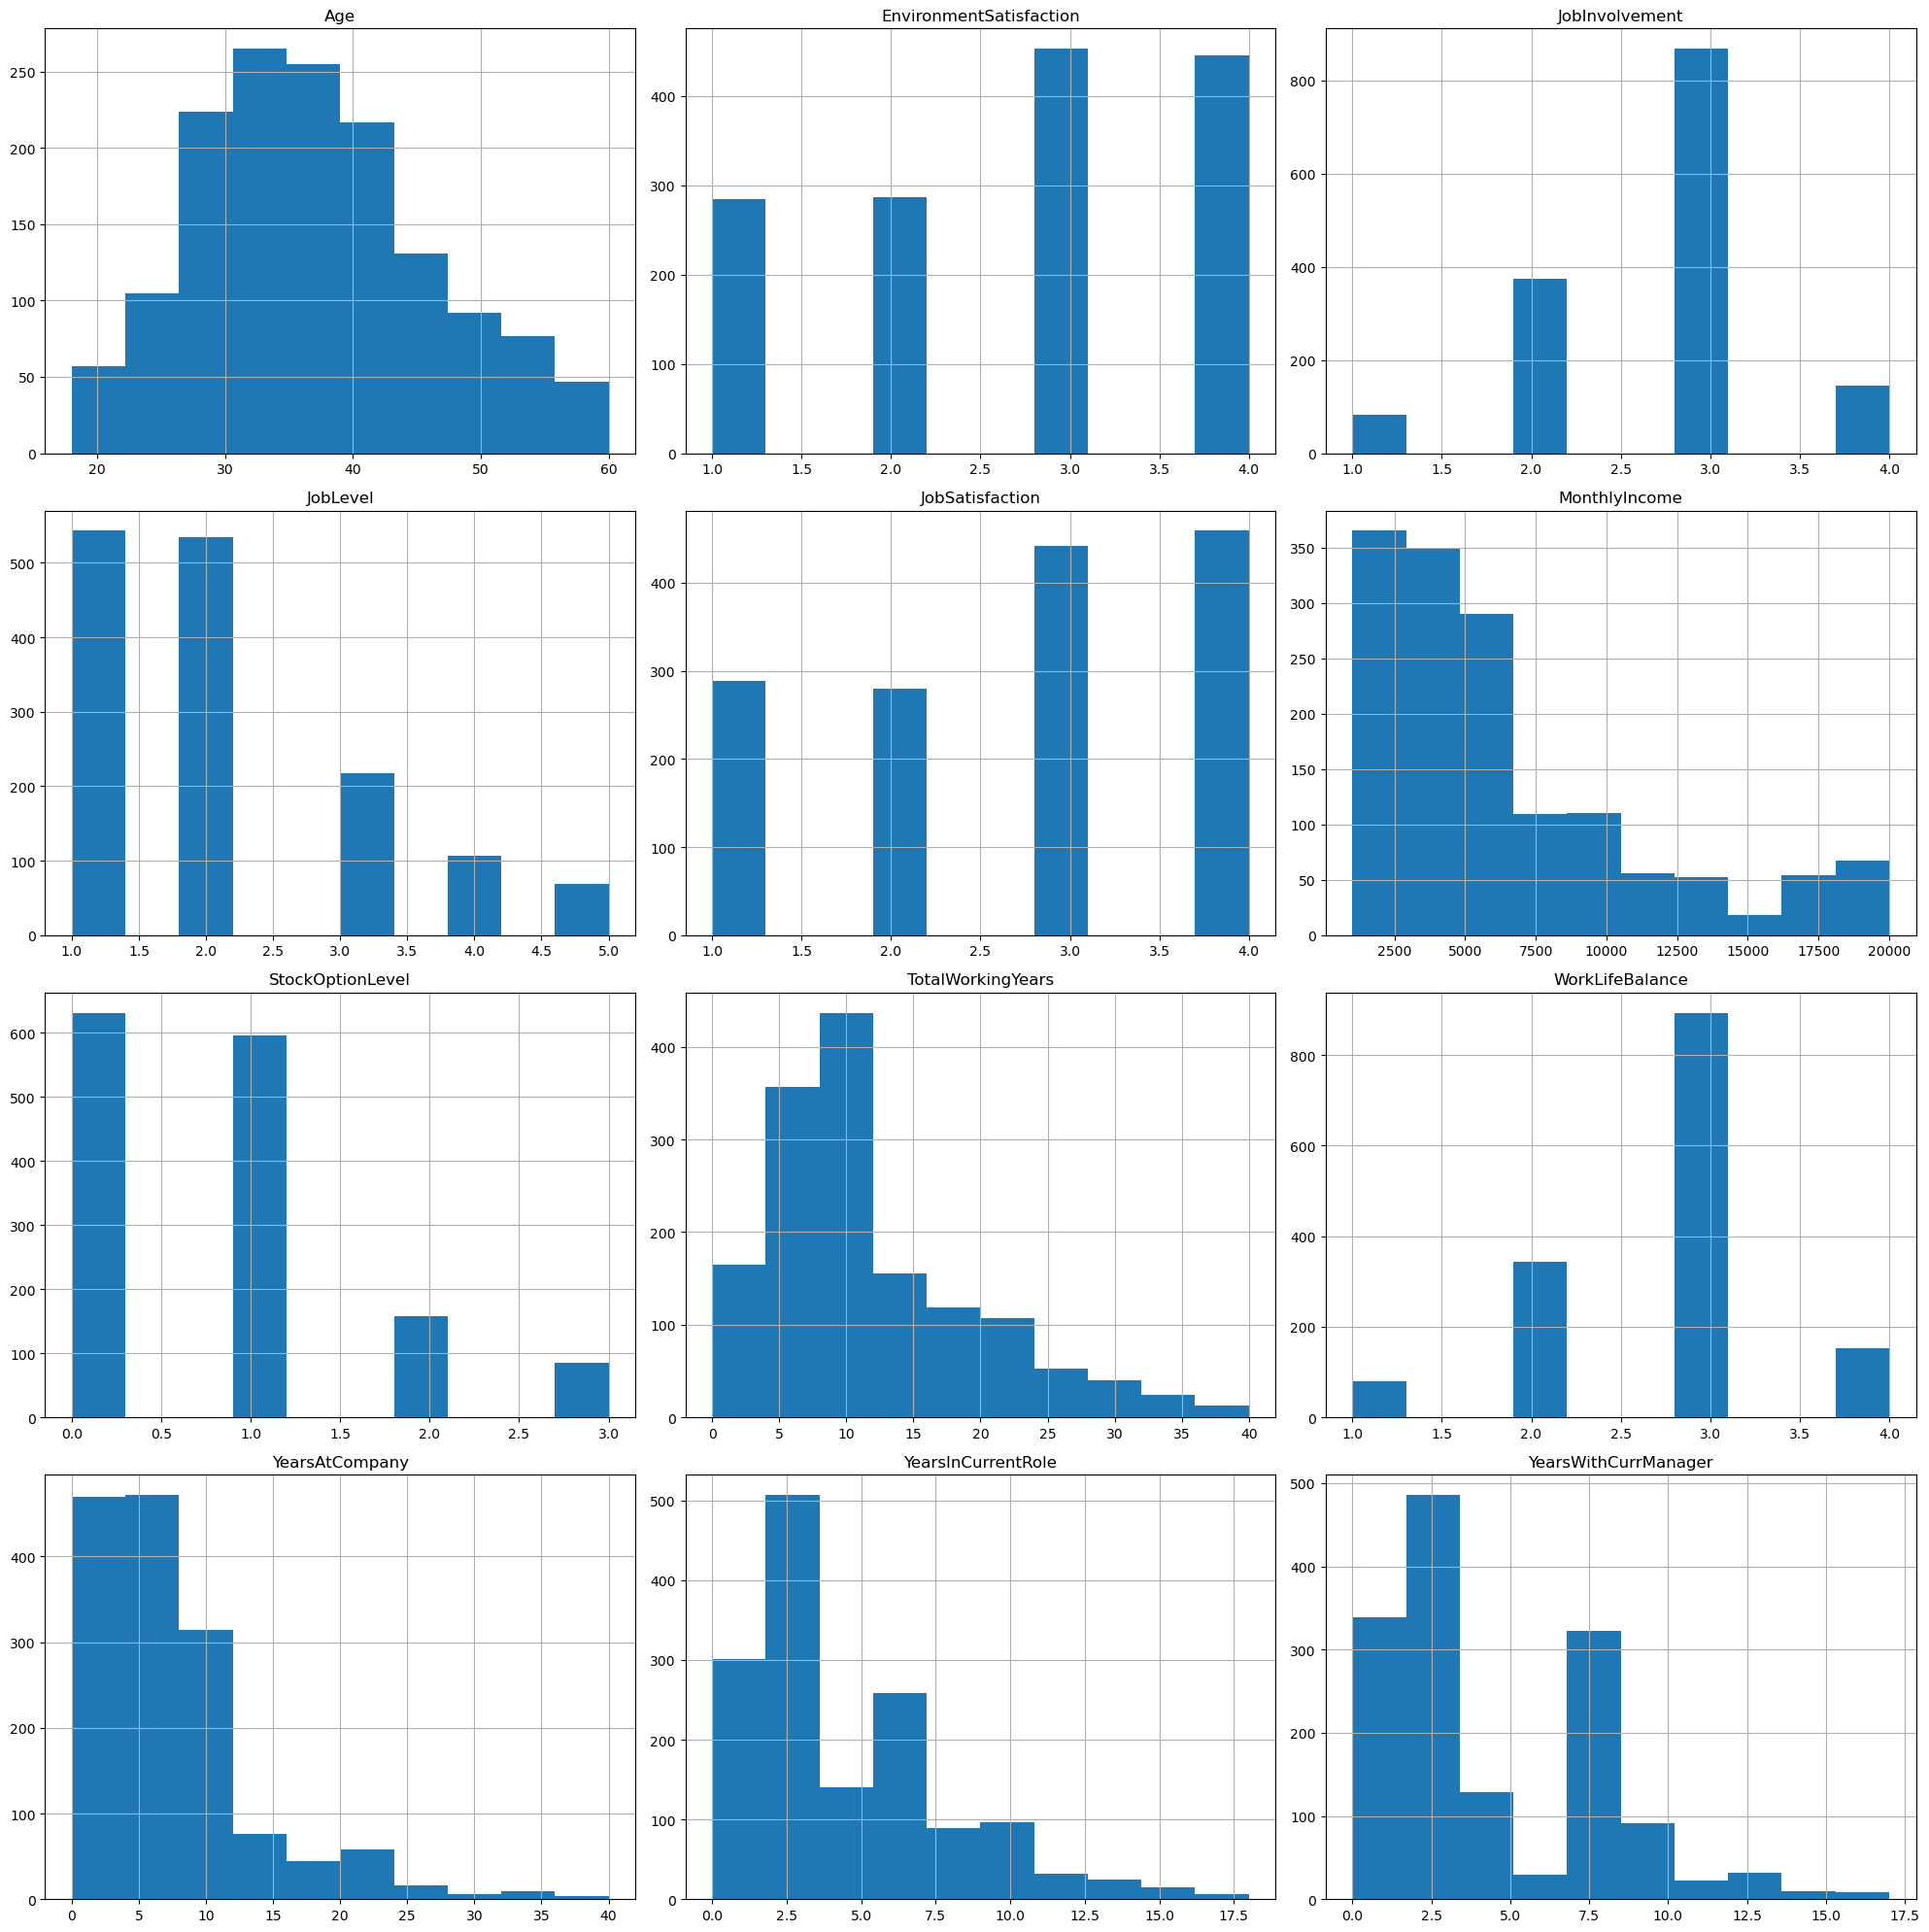

In [15]:
df.hist(figsize =(20,20))
plt.tight_layout()
plt.show()

By seeing the Histograms we cany say that most of the distibutions are right-skewed.
Age feature is not that right skewed. most of the employees are between 25-40 years age group.
Features like EmployeeCount and StandardHours can be ignored as they donot have relevant information useful to us.

In [16]:
# # #We can drop columns/features of no important or relavent
# df['EmployeeCount'].nunique()


In [17]:
# df['EmployeeCount'].nunique()


In [18]:
# df['Over18'].nunique()


In [19]:
# df['StandardHours'].nunique()

In [20]:
# df = df.drop(columns=['EmployeeCount',  'Over18', 'StandardHours'])

C:\Users\swara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


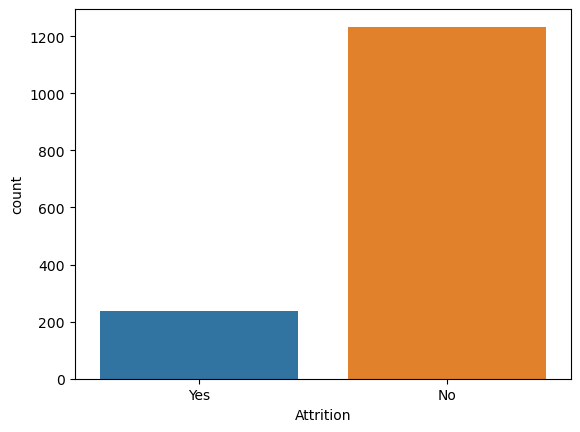

In [21]:
sns.countplot(df['Attrition']) 
plt.show()
#Attrition Count (tells about the employees left and working in the company)

In [22]:
# Employees left the company
(df.Attrition == 'Yes').sum()

237

In [23]:
# Employees with the company
(df.Attrition == 'No').sum()

1233

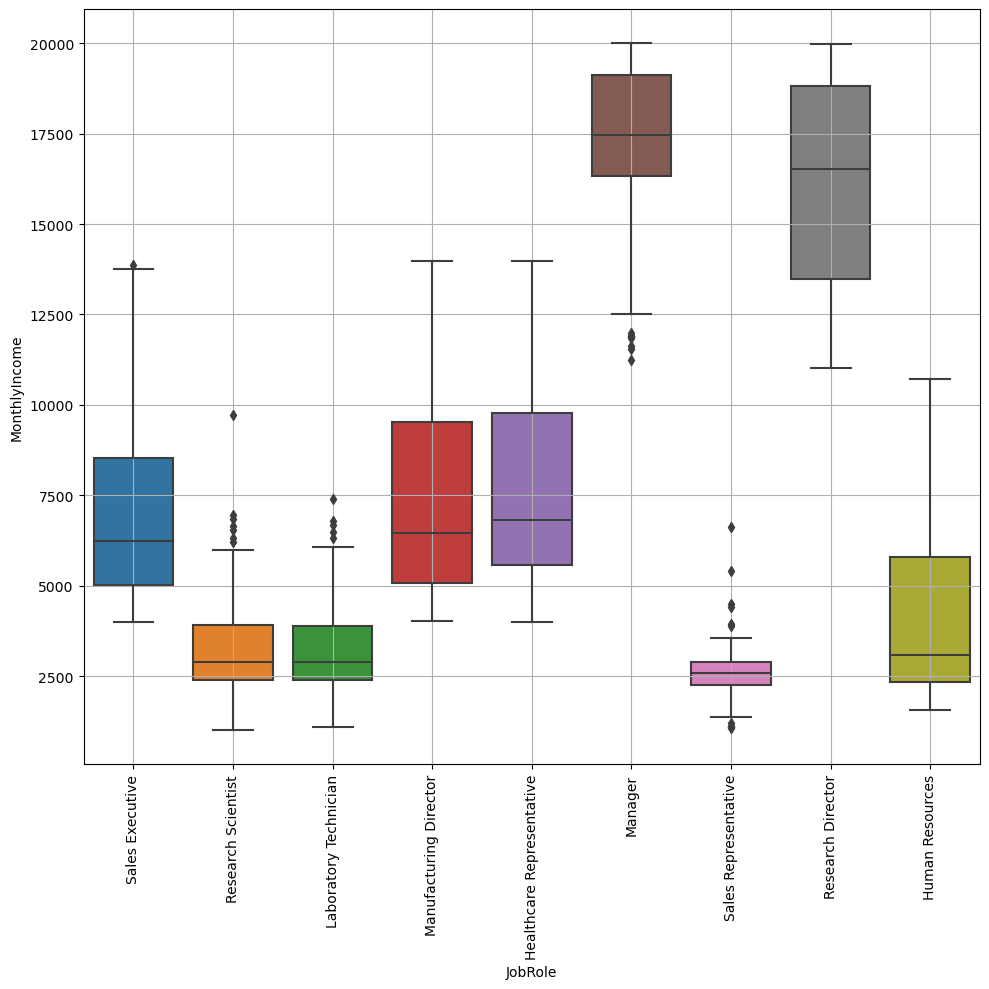

In [24]:
fig, ax = plt.subplots(1, figsize=(10, 10))
sns.boxplot(y=df['MonthlyIncome'], x=df['JobRole'])
plt.grid(True, alpha =1)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

By seeing the above box plot and other plots we can infer that the monthly income for Manager and Research Director job roles is high compared to the other. So there can be less chance of attrition in these job roles.
On the other hand monthly income is very less for Research Scientist, Laboratory Technichian and Sales Representative. So there is can be high chance of attrition in these job roles.

In [25]:
# Categorical columns
df.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'JobRole', 'MaritalStatus', 'OverTime'], dtype='object')

In [26]:
#converting object datatypes to categorical datatypes.
for column in df.columns:
    if df[column].dtype =='object':
        df[column] = df[column].astype('category')
        df[column] = df[column].astype('category').cat.codes
        

In [27]:
corr = df.corr()

In [28]:
corr

,Attrition,Age,BusinessTravel,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
Attrition,1.000000,-0.159205,0.000074,-0.103369,-0.130016,-0.169105,0.067151,-0.103481,0.162070,-0.159840,0.246118,-0.137145,-0.171063,-0.063939,-0.134392,-0.160545,-0.156199
Age,-0.159205,1.000000,0.024751,0.010146,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028062,0.037510,0.680381,-0.021490,0.311309,0.212901,0.202089
BusinessTravel,0.000074,0.024751,1.000000,0.004174,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,0.016543,-0.016727,0.034226,-0.011256,-0.014575,-0.011497,-0.022636
EnvironmentSatisfaction,-0.103369,0.010146,0.004174,1.000000,-0.008278,0.001212,-0.017321,-0.006784,-0.003593,-0.006259,0.070132,0.003432,-0.002693,0.027627,0.001458,0.018007,-0.004999
JobInvolvement,-0.130016,0.029820,0.039062,-0.008278,1.000000,-0.012630,0.006616,-0.021476,-0.038497,-0.015271,-0.003507,0.021523,-0.005533,-0.014617,-0.021355,0.008717,0.025976
JobLevel,-0.169105,0.509604,0.019311,0.001212,-0.012630,1.000000,-0.085457,-0.001944,-0.076769,0.950300,0.000544,0.013984,0.782208,0.037818,0.534739,0.389447,0.375281
JobRole,0.067151,-0.122427,0.002724,-0.017321,0.006616,-0.085457,1.000000,0.017537,0.067957,-0.093951,0.040662,-0.019171,-0.145439,0.027764,-0.083657,-0.028354,-0.041150
JobSatisfaction,-0.103481,-0.004892,-0.033962,-0.006784,-0.021476,-0.001944,0.017537,1.000000,0.024360,-0.007157,0.024539,0.010690,-0.020185,-0.019459,-0.003803,-0.002305,-0.027656
MaritalStatus,0.162070,-0.095029,0.024001,-0.003593,-0.038497,-0.076769,0.067957,0.024360,1.000000,-0.075450,-0.017521,-0.662577,-0.077886,0.014708,-0.059986,-0.065822,-0.038570
MonthlyIncome,-0.159840,0.497855,0.034319,-0.006259,-0.015271,0.950300,-0.093951,-0.007157,-0.075450,1.000000,0.006089,0.005408,0.772893,0.030683,0.514285,0.363818,0.344079


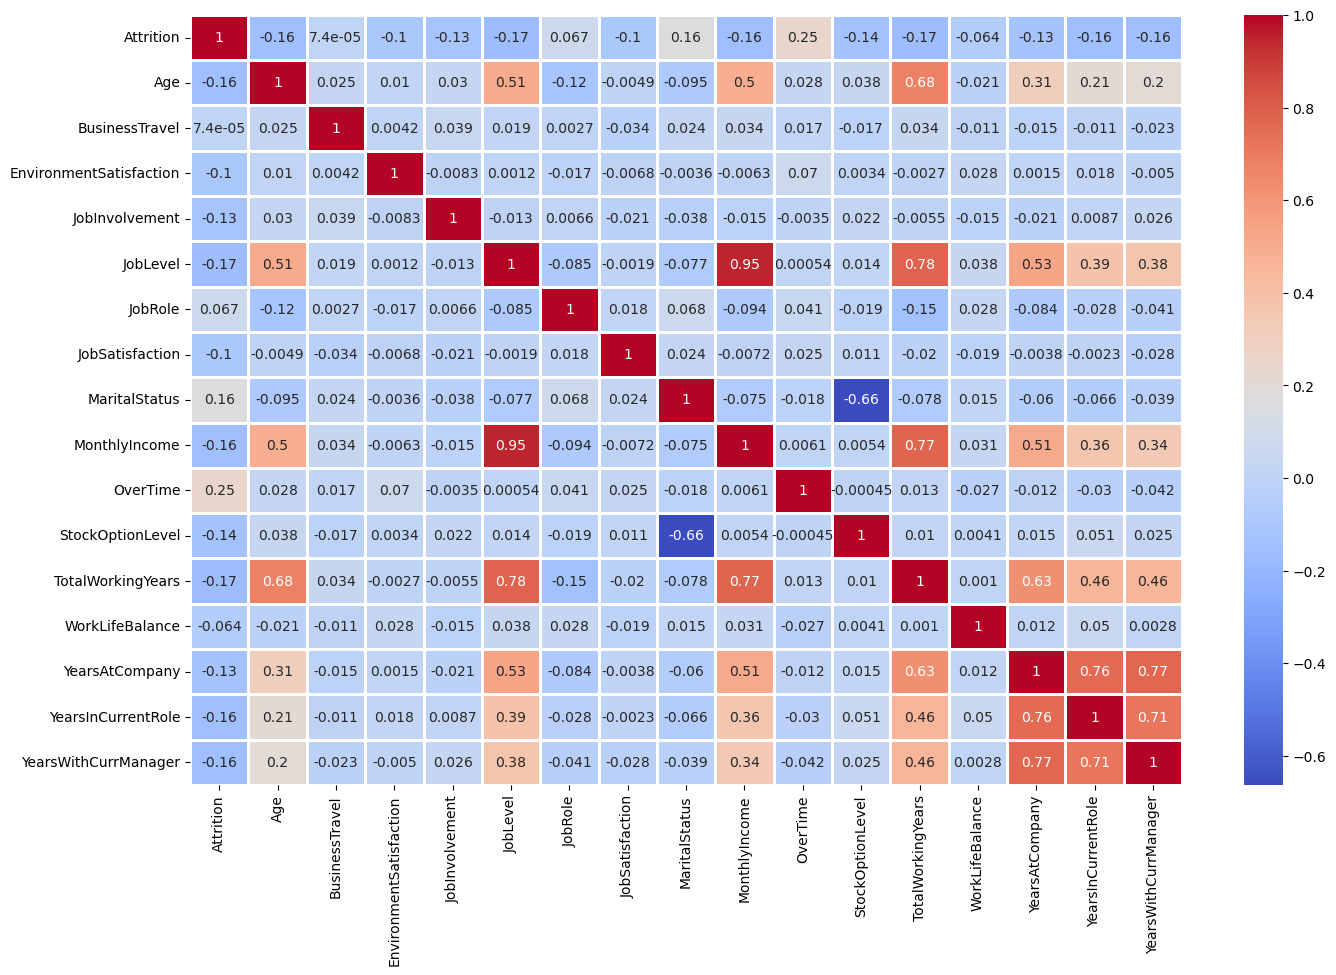

In [29]:
#Map/Matrix showing correlation between features
plt.figure(figsize =(16,10))
ax = sns.heatmap(corr, annot=True, linewidths =1, cmap='coolwarm')

In [30]:
corr_matrix = df.corr()

# Find highly correlated features
corr_threshold = 0.4
corr_pairs = {}
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            corr_pairs[corr_matrix.columns[i] + " - " + corr_matrix.columns[j]] = corr_matrix.iloc[i, j]

# Print highly correlated features
for pair, corr in corr_pairs.items():
    print(pair + " : " + str(corr))

JobLevel - Age : 0.5096042284323842
MonthlyIncome - Age : 0.4978545669265801
MonthlyIncome - JobLevel : 0.9502999134798473
StockOptionLevel - MaritalStatus : -0.6625772916604346
TotalWorkingYears - Age : 0.6803805357911985
TotalWorkingYears - JobLevel : 0.7822078045362748
TotalWorkingYears - MonthlyIncome : 0.7728932462543574
YearsAtCompany - JobLevel : 0.5347386873756308
YearsAtCompany - MonthlyIncome : 0.5142848257331957
YearsAtCompany - TotalWorkingYears : 0.6281331552682468
YearsInCurrentRole - TotalWorkingYears : 0.46036463801180993
YearsInCurrentRole - YearsAtCompany : 0.7587537366134619
YearsWithCurrManager - TotalWorkingYears : 0.45918839708314385
YearsWithCurrManager - YearsAtCompany : 0.7692124251007031
YearsWithCurrManager - YearsInCurrentRole : 0.7143647616385931


Correlation between MonthlyIncome and JobLevel is 0.95. This is a very high correlation.

Correlation between TotalWorkingYears and JobLevel is 0.78 which is also very close to 0.80.

All other variables seem to have a correlation which is less than 0.80.

In [31]:
# calculate correlation coefficients
correlations = df.corr()['Attrition'].drop('Attrition')

# print correlation coefficients in descending order
print(correlations.sort_values(ascending=False))

OverTime                   0.246118
MaritalStatus              0.162070
JobRole                    0.067151
BusinessTravel             0.000074
WorkLifeBalance           -0.063939
EnvironmentSatisfaction   -0.103369
JobSatisfaction           -0.103481
JobInvolvement            -0.130016
YearsAtCompany            -0.134392
StockOptionLevel          -0.137145
YearsWithCurrManager      -0.156199
Age                       -0.159205
MonthlyIncome             -0.159840
YearsInCurrentRole        -0.160545
JobLevel                  -0.169105
TotalWorkingYears         -0.171063
Name: Attrition, dtype: float64


In [32]:
#Split the dataset for training testing
# features


X = df.drop(columns='Attrition', axis= 1)
# target variable
y = df['Attrition']

In [33]:
#important features for predicting Attrition
from sklearn.ensemble import ExtraTreesClassifier
# Tree-based feature selection using ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)
k = 35
# get the feature importances and indices of top k features
importances = pd.Series(model.feature_importances_, index=X.columns)
indices = importances.sort_values(ascending=False)[:k].index

# select the top k features from the original DataFrame
X_selected = df[indices]
# save the x_selected DataFrame to a CSV file
X_selected.to_csv('top_features.csv', index=False)

In [34]:
X_selected

,MonthlyIncome,Age,OverTime,TotalWorkingYears,JobRole,JobSatisfaction,EnvironmentSatisfaction,YearsAtCompany,YearsWithCurrManager,WorkLifeBalance,YearsInCurrentRole,JobInvolvement,JobLevel,MaritalStatus,StockOptionLevel,BusinessTravel
0,5993,41,1,8,7,4,2,6,5,1,4,3,2,2,0,2
1,5130,49,0,10,6,2,3,10,7,3,7,2,2,1,1,1
2,2090,37,1,7,2,3,4,0,0,3,0,2,1,2,0,2
3,2909,33,1,8,6,3,4,8,0,3,7,3,1,1,0,1
4,3468,27,0,6,2,2,1,2,2,3,2,3,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2571,36,0,17,2,4,3,5,3,3,2,4,2,1,1,1
1466,9991,39,0,9,0,1,4,7,7,3,7,2,3,1,1,2
1467,6142,27,1,6,4,2,2,6,3,3,2,4,2,1,1,2
1468,5390,49,0,17,7,2,4,9,8,2,6,2,2,1,0,1


By seeing the correlation matrix we can infer that 'Attrition (Target Feature) has -ve correlation with 'Age, JobInvolvement, JobLevel, MontlyIncome, JobSatisfaction, etc., +ve corelation with OverTime, DistanceFromHome, NumberofCompaniesWorked etc

# Splitting the dataset in 80:20(80% train data, 20% test data)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
print(X_train.shape, type(X_train))

(1029, 16) <class 'pandas.core.frame.DataFrame'>


In [37]:
print(y_train.shape, type(y_train))

(1029,) <class 'pandas.core.series.Series'>


In [38]:
print(X_test.shape, type(X_test))

(441, 16) <class 'pandas.core.frame.DataFrame'>


In [39]:
print(y_test.shape, type(y_test))

(441,) <class 'pandas.core.series.Series'>


# Feature Sclaing/Standerdization

In [40]:
#Standerdization of data/Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# X_train = standard_Scaler.fit_transform(X_train)
# X_test = standard_Scaler.transform(X_test)

In [41]:
print(X_train, X_train.shape, type(X_train))

[[ 1.41369115  0.59277912  1.20114674 ... -0.32028746 -0.05899761
  -0.28567748]
 [-0.09834647  0.59277912 -0.62317798 ... -0.65002814 -0.60592139
  -0.85372023]
 [-1.71838678  0.59277912 -0.62317798 ... -0.97976881 -1.15284518
  -1.13774161]
 ...
 [-1.61038409 -0.92079337  0.28898438 ... -1.14463914 -1.15284518
  -1.13774161]
 [-0.85436528  0.59277912  1.20114674 ... -0.4851578  -0.3324595
  -0.28567748]
 [ 1.41369115  0.59277912  0.28898438 ... -0.97976881 -1.15284518
  -1.13774161]] (1029, 16) <class 'numpy.ndarray'>


In [42]:
print(y_train.shape, type(y_train))

(1029,) <class 'pandas.core.series.Series'>


In [43]:
print(X_test,X_test.shape, type(X_test))

[[-9.62367969e-01  5.92779116e-01  1.20114674e+00 ... -3.20287465e-01
  -5.89976093e-02 -2.85677478e-01]
 [ 1.73769921e+00  5.92779116e-01  1.20114674e+00 ... -4.85157800e-01
  -6.05921393e-01 -2.85677478e-01]
 [-1.39437872e+00  5.92779116e-01  1.20114674e+00 ... -9.79768807e-01
  -1.15284518e+00 -1.13774161e+00]
 ...
 [-9.62367969e-01  5.92779116e-01 -1.53534033e+00 ... -6.50028136e-01
  -6.05921393e-01 -5.69698854e-01]
 [ 2.25661592e-01  5.92779116e-01  1.20114674e+00 ... -3.20287465e-01
  -5.89976093e-02 -1.65610132e-03]
 [-2.06349158e-01  5.92779116e-01 -1.53534033e+00 ... -9.79768807e-01
  -1.15284518e+00 -1.13774161e+00]] (441, 16) <class 'numpy.ndarray'>


In [44]:
print(y_test.shape, type(y_test))

(441,) <class 'pandas.core.series.Series'>


Our objective is to predict the Attrition and give insights to HR Department to make further strategies to retain the talent and to find the replacement at the earliest.

Predicting Attrition (Target Feature) is a supervised binary classification task ( Either the employee stays or leaves the Company i.e. 1,0). 
There are different type of Supervised Machine Learning Algorithms to classify the features and a predict the future with best accuracy.
1.Decision Tree Classification
2.Random Forest
3.Logistic Regression
4.SVM Algorithm
We will compare accuracy scores for estimated predictions by the above mentioned classification models and predict the Attrition with best accuracy.
we need to train the Model and test the trained model to predict the future followed by Model Evaluation.


# Random Forest

In [45]:
# Import modules
%matplotlib inline

import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen 

In [46]:


names = ['Age', 'BusinessTravel', 'EnvironmentSatisfaction',  'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime' 'StockOptionLevel',
         'TotalWorkingYears', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager'] 

dx = ['Yes', 'No']

In [47]:
# # Setting ''EmployeeNumber' as our index
# df.set_index(['EmployeeNumber'], inplace = True) 
# # Converted to binary to help later on with models and plots
# df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})

In [48]:
df.head()

,Attrition,Age,BusinessTravel,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,1,41,2,2,3,2,7,4,2,5993,1,0,8,1,6,4,5
1,0,49,1,3,2,2,6,2,1,5130,0,1,10,3,10,7,7
2,1,37,2,4,2,1,2,3,2,2090,1,0,7,3,0,0,0
3,0,33,1,4,3,1,6,3,1,2909,1,0,8,3,8,7,0
4,0,27,2,1,3,1,2,2,1,3468,0,1,6,3,2,2,2


In [49]:
df.apply(lambda x: x.isnull().sum())

Attrition                  0
Age                        0
BusinessTravel             0
EnvironmentSatisfaction    0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
OverTime                   0
StockOptionLevel           0
TotalWorkingYears          0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsWithCurrManager       0
dtype: int64

In [50]:
# For later use in CART models
names_index = names[2:]

In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Attrition,1470.0,0.161224,0.367863,0.0,0.0,0.0,0.0,1.0
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
BusinessTravel,1470.0,1.607483,0.665455,0.0,1.0,2.0,2.0,2.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.0,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.0,5.0
JobRole,1470.0,4.458503,2.461821,0.0,2.0,5.0,7.0,8.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
MaritalStatus,1470.0,1.097279,0.730121,0.0,1.0,1.0,2.0,2.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0


In [52]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=42)

In [53]:
# np.random.seed(42)
# # start = time.time()

# # Select categorical feature columns using loop
# categorical_columns = []
# for column in X.columns:
#     if X[column].dtype == object:
#         categorical_columns.append(column)

# # Define label encoder to transform categorical features
# le = LabelEncoder()

# # Transform categorical features to numerical values
# for column in categorical_columns:
#     X[column] = le.fit_transform(X[column])

# param_dist = {'max_depth': np.arange(2,11),
#               'bootstrap': [True, False],
             
#               'max_features': ['auto', 'sqrt', 'log2', None],
#               'criterion': ['gini', 'entropy']
#               }

# cv_rf = GridSearchCV(fit_rf, cv = 10,
#                      param_grid=param_dist, 
#                      n_jobs = 3)

# cv_rf.fit(X_train, y_train)
# print('Best Parameters using grid search: \n', cv_rf.best_params_)
# # end = time.time()
# # print('Time taken in grid search: {0: .2f}'.format(end - start))

In [54]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2,3,4,6,8,10,12],
               'bootstrap': [True, False],
               'max_features': ['auto', 'sqrt', 'log2', None],
               'criterion': ['gini', 'entropy']
               }

cv_rf = GridSearchCV(fit_rf, cv = 10,
                      param_grid=param_dist, 
                     n_jobs = 2)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}
Time taken in grid search:  116.06


In [55]:
# Set best parameters given by grid search 
fit_rf.set_params(criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 8)

RandomForestClassifier(max_depth=8, random_state=42)

In [56]:
# # Set best parameters given by grid search 
# fit_rf.set_params(criterion = 'gini',
#                   max_features = 'auto', 
#                   max_depth = 12)

In [57]:
fit_rf.set_params(warm_start=False, 
                  oob_score=True)

min_estimators = 10
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(X_train, y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probab

In [58]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 10 to 2000 trees)')

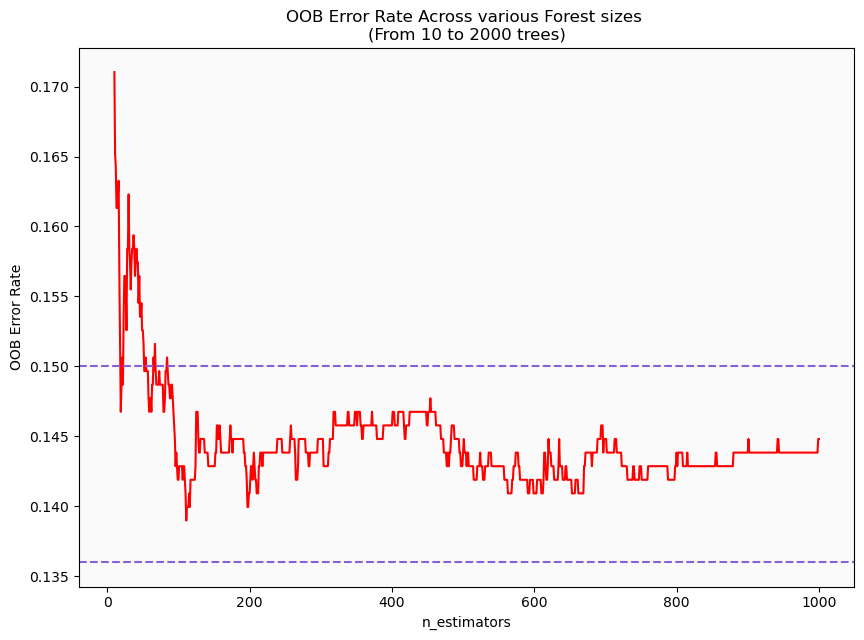

In [151]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.150, color='#875FDB',linestyle='--')
plt.axhline(0.136, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 10 to 2000 trees)')

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Generate a random dataset
# X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Create a random forest classifier with 100 estimators and fit the data
rf = RandomForestClassifier(n_estimators=191, oob_score=True, random_state=42)
rf.fit(X_train, y_train)

# Print the OOB error
print("OOB error:", 1 - rf.oob_score_)


OOB error: 0.14382896015549074


C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


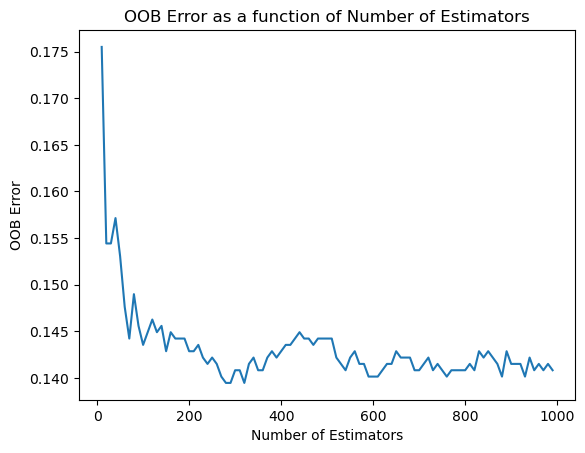

In [61]:
import matplotlib.pyplot as plt

# Generate a range of n_estimators
n_estimators_range = range(10, 1000, 10)

# Create an empty list to store the OOB errors
oob_errors = []

# Compute the OOB error for each value of n_estimators
for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, oob_score=True, random_state=42)
    rf.fit(X, y)
    oob_error = 1 - rf.oob_score_
    oob_errors.append(oob_error)

# Plot the OOB errors as a function of n_estimators
plt.plot(n_estimators_range, oob_errors)
plt.xlabel('Number of Estimators')
plt.ylabel('OOB Error')
plt.title('OOB Error as a function of Number of Estimators')
plt.show()


In [62]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_classification
# from sklearn.model_selection import GridSearchCV

# # Generate a random dataset
# # X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# # Create a random forest classifier
# rf = RandomForestClassifier(random_state=42)

# # Define the hyperparameter grid to search over
# param_grid = {
#     'n_estimators': np.arange(1,1001),
#     'max_depth': np.arange(1,11),
#     'min_samples_split': np.arange(1, 11),
#     'min_samples_leaf': [1, 2, 4,5,6]
# }

# # Perform a grid search over the hyperparameter grid using 5-fold cross-validation
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Print the best set of hyperparameters and corresponding score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)


In [201]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# import numpy as np

# # Define the range of n_estimators values to test
# n_estimators_range = np.arange(1, 1000)

# # Create a dictionary with the parameter values to test
# param_grid = {'n_estimators': n_estimators_range}

# # Create a Random Forest classifier object
# rf = RandomForestClassifier(random_state=42, oob_score=True)

# # Create a GridSearchCV object and fit it to the data
# grid_search = GridSearchCV(rf, param_grid=param_grid, cv=10, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# # Print the best value for n_estimators
# print("Best value for n_estimators:", grid_search.best_params_['n_estimators'])

C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probab

C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probab

C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probab

C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probab

KeyboardInterrupt: 

C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probab

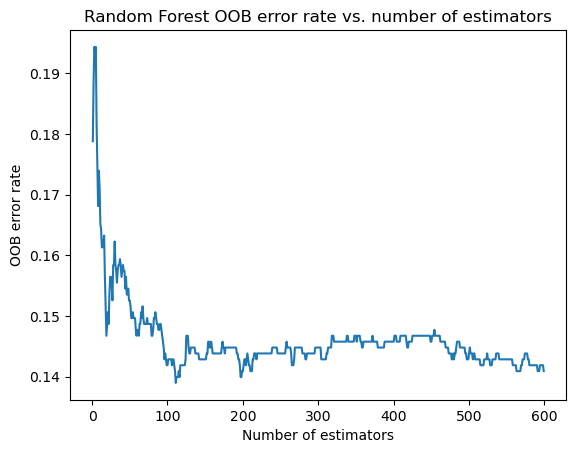

In [64]:
n_estimators_range = range(1, 600)
oob_error_rates = []
for n_estimators in n_estimators_range:
    fit_rf.set_params(n_estimators=n_estimators)
    fit_rf.fit(X_train, y_train)
    y_pred = fit_rf.predict(X_test)
    oob_error_rates.append(1 -fit_rf.oob_score_)

# plot n_estimators vs. OOB error rate
plt.plot(n_estimators_range, oob_error_rates)
plt.xlabel('Number of estimators')
plt.ylabel('OOB error rate')
plt.title('Random Forest OOB error rate vs. number of estimators')
plt.show()

In [65]:
print('OOB Error rate for 200 trees is: {0:.5f}'.format(oob_series[100]))

OOB Error rate for 200 trees is: 0.14189


In [66]:
print('OOB Error rate for 300 trees is: {0:.5f}'.format(oob_series[250]))

OOB Error rate for 300 trees is: 0.14383


In [67]:
print('OOB Error rate for 400 trees is: {0:.5f}'.format(oob_series[350]))

OOB Error rate for 400 trees is: 0.14674


In [68]:
print('OOB Error rate for 500 trees is: {0:.5f}'.format(oob_series[500]))

OOB Error rate for 500 trees is: 0.14383


In [69]:
print('OOB Error rate for 600 trees is: {0:.5f}'.format(oob_series[600]))

OOB Error rate for 600 trees is: 0.14091


In [70]:
print('OOB Error rate for 800 trees is: {0:.5f}'.format(oob_series[700]))


OOB Error rate for 800 trees is: 0.14480


In [71]:
print('OOB Error rate for 1000 trees is: {0:.5f}'.format(oob_series[800]))

OOB Error rate for 1000 trees is: 0.14383


In [72]:
print('OOB Error rate for 1000 trees is: {0:.5f}'.format(oob_series[101]))

OOB Error rate for 1000 trees is: 0.14286


In [224]:
# Create a random forest model
model = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)




Accuracy: 0.8662131519274376


C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\swara\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probab

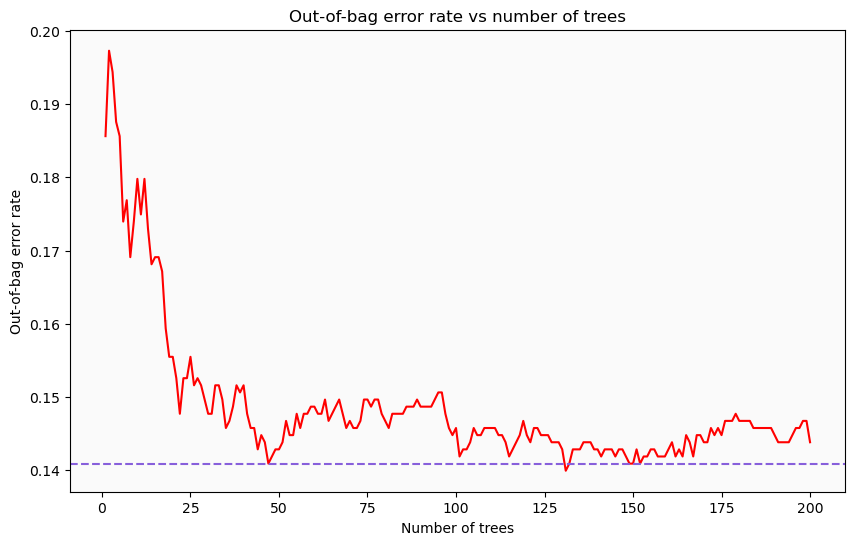

In [102]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#fafafa')

oob_scores = []
for i in range(1, 201):
    model = RandomForestClassifier(n_estimators=i, oob_score=True, random_state=42)
    model.fit(X_train, y_train)
    oob_scores.append(1 - model.oob_score_)

ax.plot(np.arange(1, 201), oob_scores, color='red')
plt.axhline(oob_error, color='#875FDB', linestyle='--')
plt.xlabel('Number of trees')
plt.ylabel('Out-of-bag error rate')
plt.title('Out-of-bag error rate vs number of trees')
plt.show()

In [75]:
print('OOB Error rate for 170 trees is: {0:.5f}'.format(oob_series[270]))

OOB Error rate for 170 trees is: 0.14480


In [202]:
# Refine the tree via OOB Output
fit_rf.set_params(n_estimators=50,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=True,
                 random_state =42)

RandomForestClassifier(max_depth=8, n_estimators=50, oob_score=True,
                       random_state=42)

In [203]:
fit_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, n_estimators=50, oob_score=True,
                       random_state=42)

In [204]:
def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [205]:
var_imp_rf = variable_importance(fit_rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

In [206]:
def print_var_importance(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on information gain for CART model.
    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns
    ----------
    Prints feature importance in descending order
    """
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      names_index[indices[i]],
                      importance[indices[f]]))

In [207]:
def print_var_importance(importance, indices, name_index):
    try:
        for f in range(len(indices)):
            print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
                  .format(f + 1,
                          name_index[indices[f]],
                          importance[indices[f]]))
    except IndexError as e:
        print("Error: Index out of range. Please check the length of the feature names list and the indices list.")
        print(e)

In [208]:
def variable_importance_plot(importance, indices, name_index):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')  # replace set_axis_bgcolor with set_facecolor
    plt.title('Feature importances for Random Forest Model\\EmployeeAttrition')
    plt.barh(range(len(indices)), 
             importance[indices], 
             align='center')
    plt.yticks(range(len(indices)), 
               [name_index[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

In [209]:
import matplotlib.pyplot as plt

def variable_importance_plot(importance, indices, name_index):
    try:
        plt.barh(range(len(indices)), 
                 importance[indices], 
                 align='center')
        plt.yticks(range(len(indices)), 
                   [name_index[i] for i in indices])
        plt.xlabel('Relative Importance')
        plt.show()
    except IndexError as e:
        print("Error: Index out of range. Please check the length of the feature names list and the indices list.")
        print(e)

In [210]:
predictions_rf = fit_rf.predict(X_test)

In [211]:
# def create_conf_mat(y_test, predictions):
#     """Function returns confusion matrix comparing two arrays"""
#     if (len(y_test.shape) != len(predictions.shape) == 1):
#         return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
#     elif (y_test.shape != predictions.shape):
#         return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
#     else:
#         # Set Metrics
#         test_crosstb_comp = pd.crosstab(index = y_test,
#                                         columns = predictions)
#         # Changed for Future deprecation of as_matrix
#         test_crosstb = test_crosstb_comp.values
#         return test_crosst

In [212]:
def create_conf_mat(y_test, predictions_rf):
    conf_mat = pd.crosstab(y_test, predictions_rf, rownames=['Actual'], colnames=['Predicted'])
    # Convert to numpy array for compatibility with sns heatmap
    conf_mat = np.array(conf_mat)
    return conf_mat

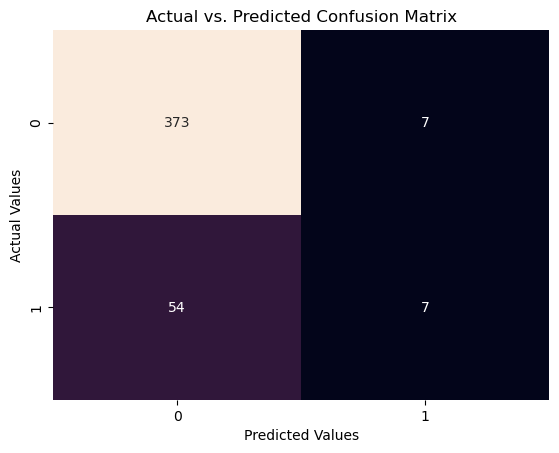

In [213]:
conf_mat = create_conf_mat(y_test, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

# Accuracy

In [214]:
accuracy_rf = fit_rf.score(X_test, y_test)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.862


# Error Rate

In [215]:
# Here we calculate the test error rate!
test_error_rate_rf = 1 - accuracy_rf
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

The test error rate for our model is:
  0.1383


# Area Under Curve(AUC)

In [216]:
# We grab the second array from the output which corresponds to
# to the predicted probabilites of positive classes 
# Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class
predictions_rf_prob = fit_rf.predict_proba(X_test)[:, 1]

fpr2, tpr2, _ = roc_curve(y_test,
                          predictions_rf_prob,
                          pos_label = 1)

In [217]:
auc_rf = auc(fpr2, tpr2)

In [218]:
def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):
    """
    Purpose
    ----------
    Function creates ROC Curve for respective model given selected parameters.
    Optional x and y limits to zoom into graph

    Parameters
    ----------
    * fpr: Array returned from sklearn.metrics.roc_curve for increasing
            false positive rates
    * tpr: Array returned from sklearn.metrics.roc_curve for increasing
            true positive rates
    * auc: Float returned from sklearn.metrics.auc (Area under Curve)
    * estimator: String represenation of appropriate model, can only contain the
    following: ['knn', 'rf', 'nn']
    * xlim: Set upper and lower x-limits
    * ylim: Set upper and lower y-limits
    """
    my_estimators = {'knn': ['Kth Nearest Neighbor', 'deeppink'],
              'rf': ['Random Forest', 'red'],
              'nn': ['Neural Network', 'purple']}

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

C:\Users\swara\AppData\Local\Temp\ipykernel_11720\2153116955.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
C:\Users\swara\AppData\Local\Temp\ipykernel_11720\2153116955.py:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')


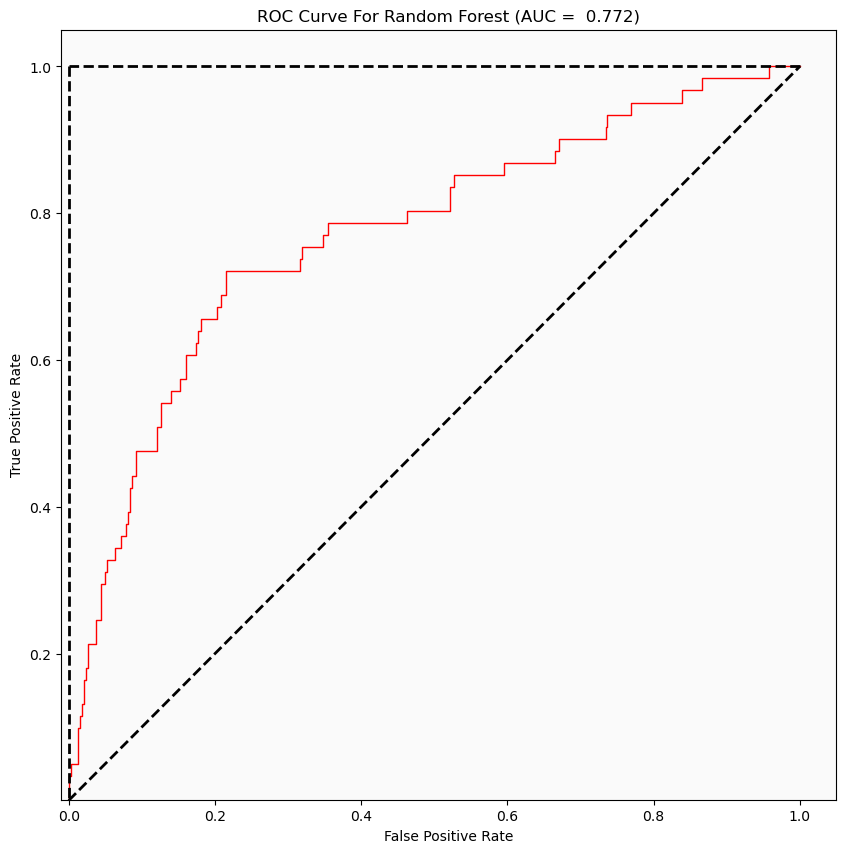

In [219]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

In [220]:
# calculate ROC AUC and accuracy scores on test set
y_pred_proba =fit_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, fit_rf.predict(X_test))


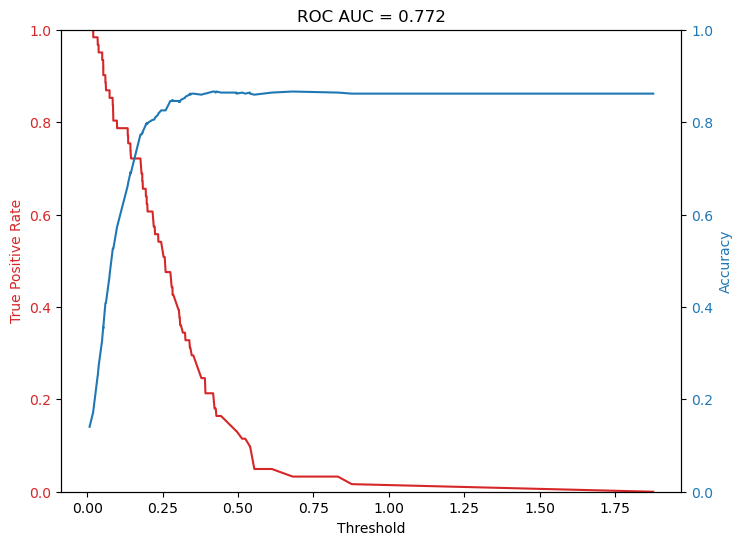

In [221]:

# plot ROC curve and accuracy
fig, ax1 = plt.subplots(figsize=(8, 6))
color = 'tab:red'
ax1.set_xlabel('Threshold')
ax1.set_ylabel('True Positive Rate', color=color)
ax1.plot(thresholds, tpr, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0, 1])
ax2 = ax1.twinx()  # create a second y-axis that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(thresholds, [accuracy_score(y_test, y_pred_proba > t) for t in thresholds], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0, 1])
plt.title(f'ROC AUC = {roc_auc:.3f}')
plt.show()



In [222]:
def print_class_report(predictions_rf, y_test, alg_name):
    """
    Purpose
    ----------
    Function helps automate the report generated by the
    sklearn package. Useful for multiple model comparison

    Parameters:
    ----------
    predictions: The predictions made by the algorithm used
    true_labels: The true labels (target values) for the test set
    alg_name: String containing the name of the algorithm used
    
    Returns:
    ----------
    Returns classification report generated from sklearn. 
    """
    print('Classification Report for {0}:'.format(alg_name))
    print(classification_report(y_test, predictions_rf))
    return classification_report(y_test, predictions_rf)


In [223]:
class_report = print_class_report(predictions_rf, y_test, 'Random Forest')

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       380
           1       0.50      0.11      0.19        61

    accuracy                           0.86       441
   macro avg       0.69      0.55      0.56       441
weighted avg       0.82      0.86      0.82       441



[0.21541950113378683,
 0.1496598639455783,
 0.1882086167800453,
 0.12698412698412698,
 0.1655328798185941,
 0.1428571428571429,
 0.1428571428571429,
 0.13378684807256236,
 0.1496598639455783,
 0.14058956916099774,
 0.14739229024943312,
 0.14512471655328796,
 0.14739229024943312,
 0.1315192743764172,
 0.13605442176870752,
 0.1496598639455783,
 0.1428571428571429,
 0.14512471655328796,
 0.1496598639455783,
 0.13832199546485258,
 0.1428571428571429,
 0.14058956916099774,
 0.1315192743764172,
 0.13378684807256236,
 0.1496598639455783,
 0.13832199546485258,
 0.1496598639455783,
 0.13378684807256236,
 0.13605442176870752,
 0.13378684807256236,
 0.1315192743764172,
 0.13378684807256236,
 0.1315192743764172,
 0.13832199546485258,
 0.13378684807256236,
 0.13378684807256236,
 0.12925170068027214,
 0.13378684807256236,
 0.13832199546485258]